# Explore here

In [9]:
# Your code here
import os
from dotenv import load_dotenv
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# cargar las variables del archivo .env
load_dotenv()




False

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


*Faltan algunos datos en 'name' y 'host_name'
*Faltan la misma cantidad de datos en 'last_review' y 'reviews_per_month', seguramente son casas que llevan poco tiempo en la plataforma y no tienen review


In [3]:
#GUARDO LOS DATOS EN CRUDO EN LA CARPETA ESPECIFICADA

df.to_csv('../data/raw/df.csv')

In [4]:
#COMIENZO CON EL EDA
#Busco duplicados en los datos categoricos  


print('Id duplicados',df['id'].duplicated().sum())
print('Nombres duplicados',df['name'].duplicated().sum())
print('Host Id duplicados',df['host_id'].duplicated().sum())




Id duplicados 0
Nombres duplicados 989
Host Id duplicados 11438


Todo parece normal, ya que no hay Id's duplicados. Si hay nombres de casas duplicados, que se puede dar porque suelen llamarse muy parecido. 
Por ultimo los Id's de los hosts repetidos son de esperarse porque la misma person puede tener varias casas publicadas.

In [7]:
#Busco informacion irrelevante para borrar del dataframe

df.drop(["id", "name", "host_name","reviews_per_month"], axis = 1, inplace = True)


In [10]:
df.head(3)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365


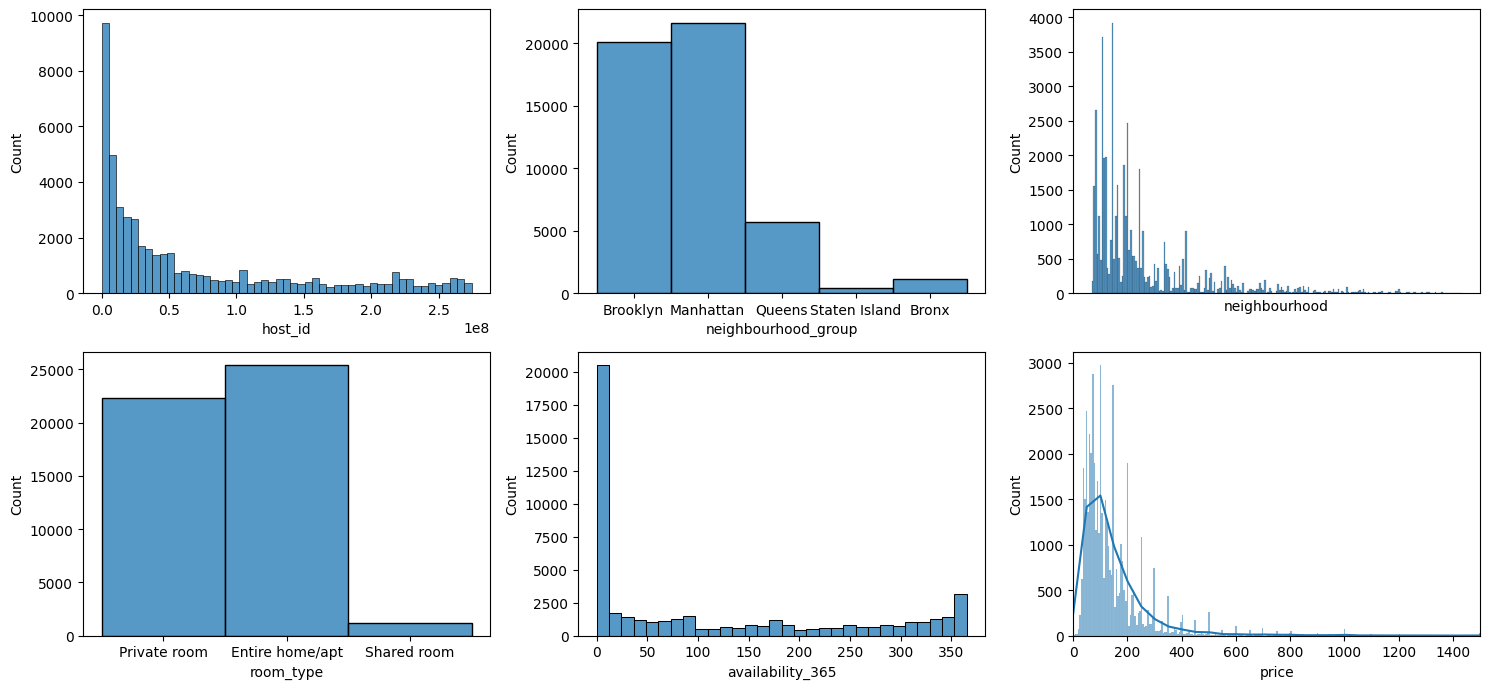

In [29]:
#Analisis de variables univariante 

fig, axis = plt.subplots(2, 3, figsize = (15, 7))

sns.histplot(ax = axis[0, 0], data = df, x = "host_id")
sns.histplot(ax = axis[0, 1], data = df, x = "neighbourhood_group")
sns.histplot(ax = axis[0, 2], data = df, x = "neighbourhood").set_xticks([])
sns.histplot(ax = axis[1, 0], data = df, x = "room_type")
sns.histplot(ax = axis[1, 1], data = df, x = "availability_365")
sns.histplot(ax = axis[1, 2], data = df, x = "price", kde=True).set_xlim(0,1500)
# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()



In [ ]:


sns.histplot(ax = axis[1, 2], data = df, x = "price", kde=True).set_xlim(0,1500)
